In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

diabetes=pd.read_csv("diabetes.csv")


In [2]:
diabetes



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50.00,1
1,1,85,66,29,0,26.6,0.351,31.00,0
2,8,183,64,0,0,23.3,0.672,32.00,1
3,1,89,66,23,94,28.1,0.167,21.00,0
4,0,137,40,35,168,43.1,2.288,33.00,1
...,...,...,...,...,...,...,...,...,...
769,8,95,85,39,0,29.0,5.000,0.29,1
770,1,126,60,0,0,30.1,0.349,47.00,1
771,0,123,72,0,0,36.3,0.258,52.00,1
772,1,106,76,0,0,37.5,0.197,26.00,0


In [3]:
print(diabetes.describe())
X = diabetes.iloc[:, 0:8]
y = diabetes.iloc[:, 8]
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

for column in zero_not_accepted:
    X[column] = X[column].replace(0, np.NaN)
    mean = int(X[column].mean(skipna=True))
    X[column] = X[column].replace(np.NaN, mean)

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   774.000000  774.000000     774.000000     774.000000  774.000000   
mean      3.839793  120.913437      69.169251      20.471576   79.180879   
std       3.366784   31.972644      19.314408      15.979728  115.009290   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.500000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   23.000000   
75%       6.000000  140.000000      80.000000      32.000000  126.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  774.000000                774.000000  774.000000  774.000000  
mean    31.998320                  0.479952   33.230682    0.351421  
std      7.860882                  0.379315   11.924666    0.477723  
min      0.000000                  

In [4]:
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50.0,1
1,1,85,66,29,0,26.6,0.351,31.0,0
2,8,183,64,0,0,23.3,0.672,32.0,1
3,1,89,66,23,94,28.1,0.167,21.0,0
4,0,137,40,35,168,43.1,2.288,33.0,1
5,5,116,74,0,0,25.6,0.201,30.0,0
6,3,78,50,32,88,31.0,0.248,26.0,1
7,10,115,0,0,0,35.3,0.134,29.0,0
8,2,197,70,45,543,30.5,0.158,53.0,1
9,8,125,96,0,0,0.0,0.232,54.0,1


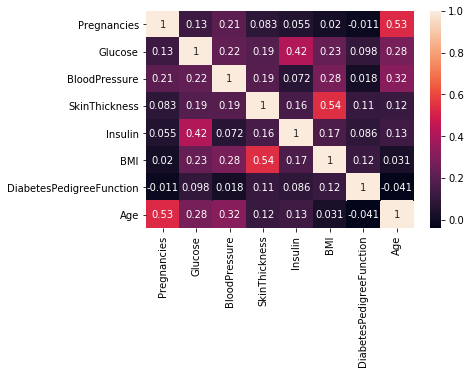

In [5]:
sns.heatmap(X.corr(), annot = True)

In [6]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)



In [7]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [8]:
y_pred = classifier.predict(X_test)
print(y_pred)



[0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1
 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1
 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0]


In [10]:
cm = confusion_matrix(y_test, y_pred)
print (cm)
print()
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[83 14]
 [25 33]]

0.6285714285714287
0.7483870967741936
             precision    recall  f1-score   support

          0       0.77      0.86      0.81        97
          1       0.70      0.57      0.63        58

avg / total       0.74      0.75      0.74       155



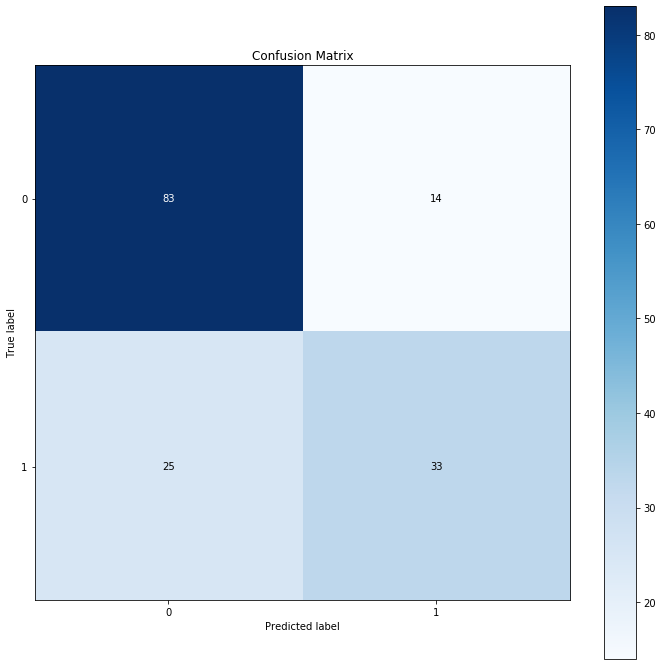

In [12]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(12,12))   